In [1]:
#some import important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data set
df = pd.read_csv("/content/drive/MyDrive/dataset.csv",encoding='latin-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
#the shape of the data set
print("shape of the Train data set:",df.shape)

shape of the Train data set: (99989, 3)


In [4]:
#How to check nan values in whole data set
print(df.isnull().sum())

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64


In [5]:
#how to check column in data set
print("columns of train data set:",df.columns)

columns of train data set: Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')


In [6]:
#cheacking out the twitter reviews positive comment on data set
df[df['Sentiment']== 1].head(10)

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


In [7]:
#cheacking out the twitter reviews negative comment on data set
df[df['Sentiment']== 0].head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [8]:
#define groupby data set
df.groupby('Sentiment').describe()

ItemID                              ...                            
             count          mean           std  ...      50%      75%       max
Sentiment                                       ...                            
0          43532.0  47383.876413  29754.229279  ...  46716.0  73366.0   99998.0
1          56457.0  52026.250775  27994.983763  ...  52305.0  76096.0  100000.0

[2 rows x 8 columns]

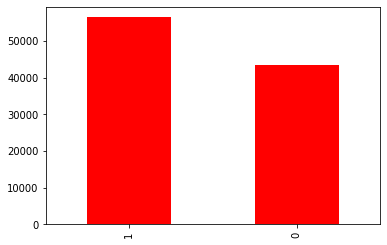

In [9]:
#how to count values
df['Sentiment'].value_counts().plot.bar(color='red', figsize=(6,4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

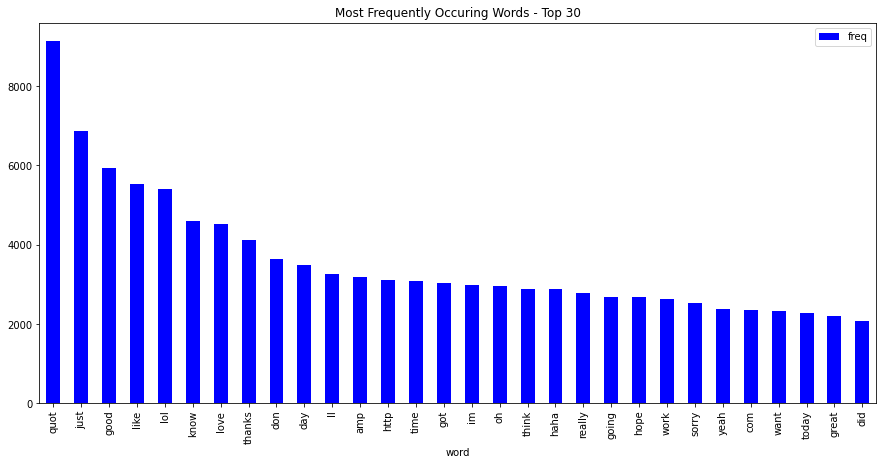

In [10]:
#Feature extraction using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [11]:
#Dropping the 'id' column
df.drop('ItemID', axis=1, inplace=True)

In [12]:
df.columns

Index(['Sentiment', 'SentimentText'], dtype='object')

In [13]:
#Importing essential libraries for performing Natural Language Processing
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Cleaning the dataset
corpus = []
ps = PorterStemmer()
for i in range(0,df.shape[0]):
  #Cleaning Special Character from the  SentimentText
  SentimentText = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.SentimentText[i])
  #convert the entrie row  SentimentText to the lower case
  SentimentText = SentimentText.lower()
  #Tokenizing the SentimentTexte into reviews words
  words = SentimentText.split()
  #Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]
  #Stemming the words
  words = [ps.stem(word) for word in words]
  #Joining the Stemmend words
  SentimentText = ' '.join(words)
  #Buliding a corpus of  SentimentText
  corpus.append(SentimentText)

In [15]:
corpus[0:10]

['sad apl friend',
 'miss new moon trailer',
 'omg alreadi',
 'omgaga im sooo im gunna cri dentist sinc supos get crown put min',
 'think mi bf cheat',
 'worri much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunni work tomorrow tv tonight',
 'hand uniform today miss alreadi',
 'hmmmm wonder number']

In [16]:
#Creating the Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(99989, 2000)

In [18]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
#Extracting dependant variable to the data set
y = df['Sentiment']

In [20]:
y

0        0
1        0
2        1
3        0
4        0
        ..
99984    0
99985    1
99986    0
99987    1
99988    1
Name: Sentiment, Length: 99989, dtype: int64

In [21]:
#Spliting the data set using train_test_split
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
training_x.shape

(79991, 2000)

In [23]:
test_y

33965    1
22853    1
19448    0
9732     1
7129     1
        ..
41962    1
45550    0
99653    0
13568    0
92717    1
Name: Sentiment, Length: 19998, dtype: int64

Model Building

In [24]:
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_x,training_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
#predicting the result
y_pred = lr.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      8750
           1       0.74      0.83      0.78     11248

    accuracy                           0.74     19998
   macro avg       0.74      0.73      0.73     19998
weighted avg       0.74      0.74      0.74     19998



In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ",accuracy_score(test_y,y_pred))

Accuracy Score is:  0.7393739373937394


In [28]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(test_y,y_pred)

In [29]:
lr_cm

array([[5443, 3307],
       [1905, 9343]])

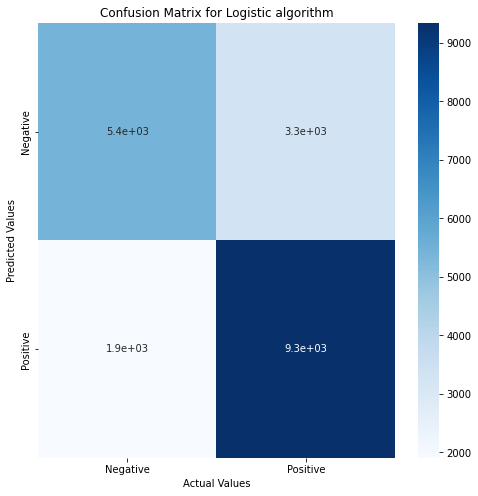

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Logistic algorithm")
plt.show()

In [31]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB()

In [32]:
#Predicting the results
y_pred = mnb.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      8750
           1       0.76      0.77      0.77     11248

    accuracy                           0.73     19998
   macro avg       0.73      0.73      0.73     19998
weighted avg       0.73      0.73      0.73     19998



In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,y_pred)
print("Accuracy Score is: {}".format(round(score*100,2)))

Accuracy Score is: 73.44


In [35]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
mnb_cm = confusion_matrix(test_y,y_pred)

In [36]:
mnb_cm

array([[5975, 2775],
       [2536, 8712]])

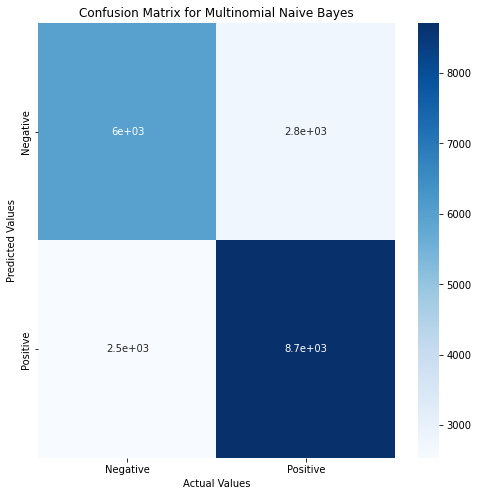

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(data=mnb_cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

In [38]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(training_x,training_y)

AdaBoostClassifier()

In [39]:
#predicting the result
y_pred = adb.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54      8750
           1       0.66      0.88      0.76     11248

    accuracy                           0.68     19998
   macro avg       0.70      0.65      0.65     19998
weighted avg       0.69      0.68      0.66     19998



In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ",accuracy_score(test_y,y_pred))

Accuracy Score is:  0.6811681168116812


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
adb_cm = confusion_matrix(test_y,y_pred)
adb_cm

array([[3779, 4971],
       [1405, 9843]])

In [44]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54      8750
           1       0.66      0.88      0.76     11248

    accuracy                           0.68     19998
   macro avg       0.70      0.65      0.65     19998
weighted avg       0.69      0.68      0.66     19998



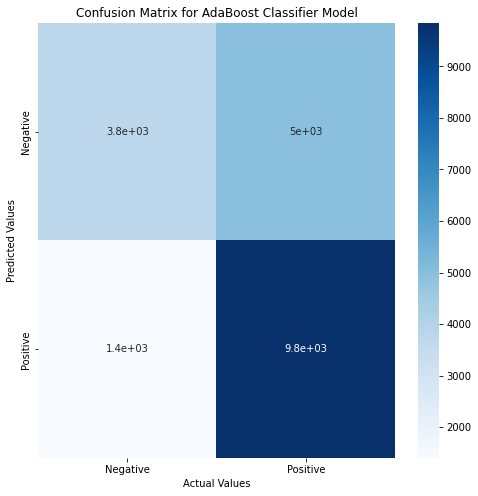

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data=adb_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for AdaBoost Classifier Model")
plt.show()

In [46]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(training_x,training_y)

RandomForestClassifier()

In [47]:
#predicting the result
y_pred = rfc.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67      8750
           1       0.74      0.78      0.76     11248

    accuracy                           0.72     19998
   macro avg       0.71      0.71      0.71     19998
weighted avg       0.72      0.72      0.72     19998



In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.7177217721772178


In [50]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(test_y,y_pred)
rfc_cm

array([[5630, 3120],
       [2525, 8723]])

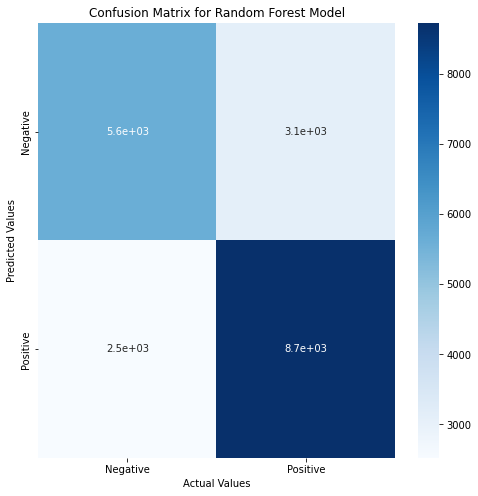

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(data=rfc_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [52]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(training_x,training_y)

BaggingClassifier()

In [53]:
#predicting the result
y_pred = bc.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      8750
           1       0.72      0.73      0.73     11248

    accuracy                           0.69     19998
   macro avg       0.69      0.69      0.69     19998
weighted avg       0.69      0.69      0.69     19998



In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.6912191219121913


In [56]:
from sklearn.metrics import confusion_matrix
bc_cm = confusion_matrix(test_y,y_pred)
bc_cm

array([[5616, 3134],
       [3041, 8207]])

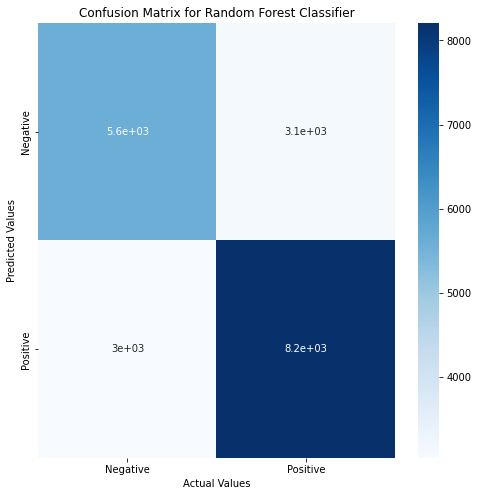

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(data=bc_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [58]:
#xgboost classifier
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(training_x,training_y)

XGBClassifier()

In [59]:
#predicting the result
y_pred = xgb.predict(test_x)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [60]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.35      0.48      8750
           1       0.65      0.93      0.76     11248

    accuracy                           0.67     19998
   macro avg       0.72      0.64      0.62     19998
weighted avg       0.71      0.67      0.64     19998



In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.6733673367336733


In [62]:
from sklearn.metrics import confusion_matrix
xg_cm = confusion_matrix(test_y,y_pred)
xg_cm

array([[ 3045,  5705],
       [  827, 10421]])

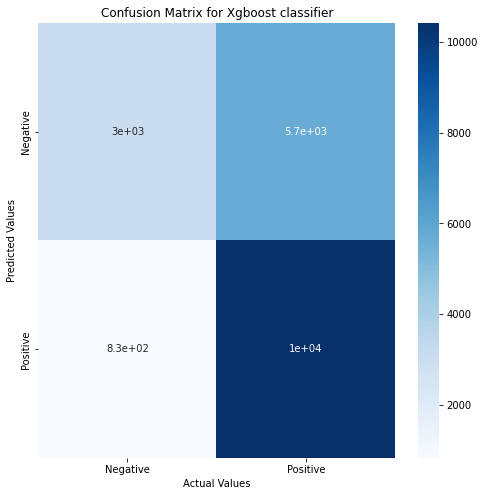

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(data=xg_cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Xgboost classifier")
plt.show()